## 합성곱 신경망을 사용한 이미지 분류

In [72]:
# 패션MNIST 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0  # 흑백 입력 이미지의 채널 차원을 추가함.
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

import warnings
warnings.filterwarnings('ignore')

In [37]:
# 합성곱 신경망 만들기
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4)) # 은닉층의 오버피팅을 막아 성능을 개선함.
model.add(keras.layers.Dense(10, activation='softmax')) # 10개의 클래스를 분류함.

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

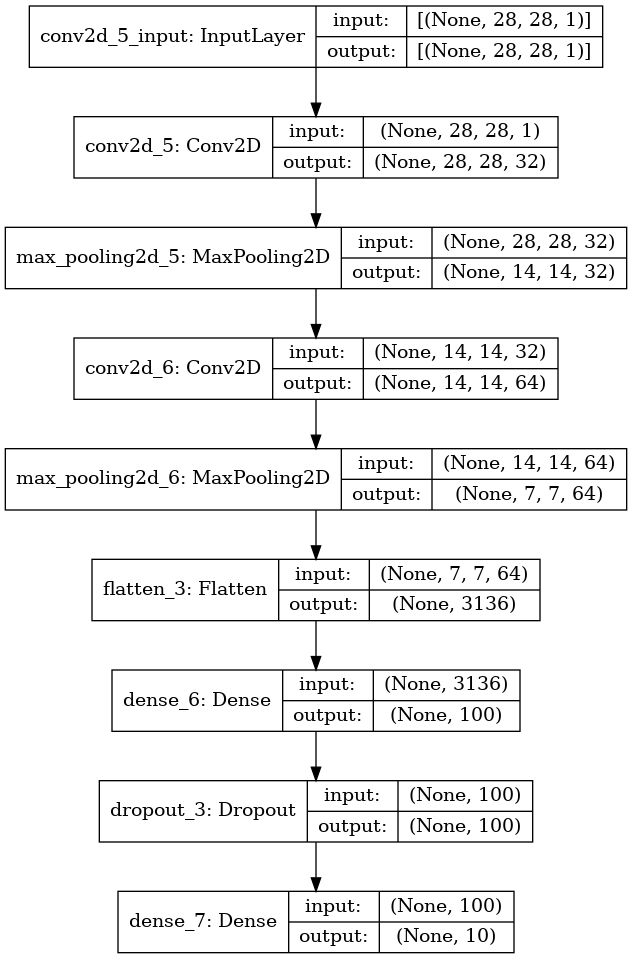

In [38]:
keras.utils.plot_model(model, show_shapes=True)

In [39]:
# 모델 컴파일과 훈련
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy' )
checkpoint_cb = keras.callbacks.ModelCheckpoint( 'best-cnn-model.h5', save_best_only = True )
early_stopping_cb = keras.callbacks.EarlyStopping( patience=2, restore_best_weights=True )
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5121 - accuracy: 0.8167 - val_loss: 0.3223 - val_accuracy: 0.8803
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3341 - accuracy: 0.8797 - val_loss: 0.2748 - val_accuracy: 0.8993
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2870 - accuracy: 0.8963 - val_loss: 0.2629 - val_accuracy: 0.9001
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2538 - accuracy: 0.9073 - val_loss: 0.2434 - val_accuracy: 0.9076
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2306 - accuracy: 0.9156 - val_loss: 0.2260 - val_accuracy: 0.9173
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2100 - accuracy: 0.9230 - val_loss: 0.2157 - val_accuracy: 0.9194
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1920 - accuracy: 0.9291 - val_loss: 0.2255 - val_accuracy:

In [40]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2157 - accuracy: 0.9194


[0.21568480134010315, 0.9194166660308838]

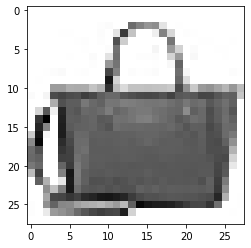

In [106]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [108]:
import numpy as np
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
preds = model.predict(val_scaled[:1])
print(classes[np.argmax(preds)]) #모델이 예측한 값을 출력함.

가방


In [44]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [45]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2360 - accuracy: 0.9157


[0.2359619438648224, 0.9157000184059143]

## 합성곱 신경망의 시각화

In [46]:
model = keras.models.load_model('best-cnn-model.h5')
model.layers

In [93]:
# 첫번째 합성곱 층의 가중치 형상 출력
conv1 = model.layers[0]
print(conv1.weights[0].shape) 

(3, 3, 1, 32)


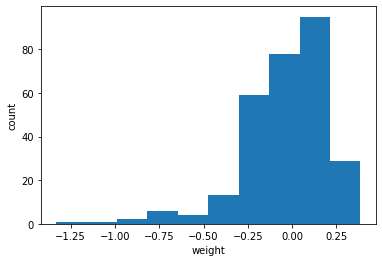

In [95]:
# 첫번째 합성곱 층의 가중치 분포 시각화
import matplotlib.pyplot as plt
conv1_weights = conv1.weights[0].numpy()
plt.hist(conv1_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

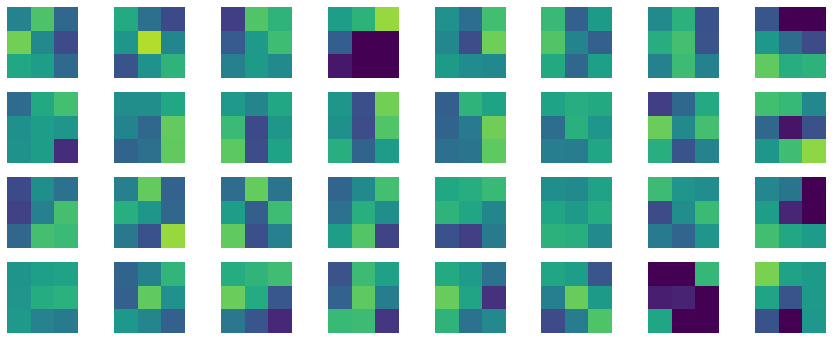

In [127]:
# 첫번째 합성곱 층의 필터(커널) 시각화
fig, axs = plt.subplots(4, 8, figsize=(15,6))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(conv1_weights[:, :, 0, i*8+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()
# 밝은 색 부분에서 가중치가 크게 활성화됨.

In [113]:
# 두번째 합성곱 층의 가중치 형상 출력
conv2 = model.layers[2]
print(conv2.weights[0].shape) 

(3, 3, 32, 64)


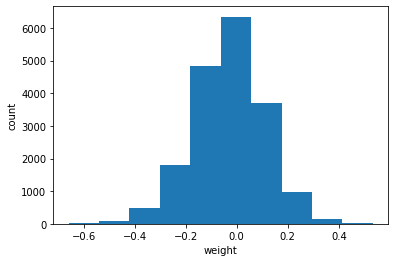

In [114]:
# 두번째 합성곱 층의 가중치 분포 시각화
import matplotlib.pyplot as plt
conv2_weights = conv2.weights[0].numpy()
plt.hist(conv2_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

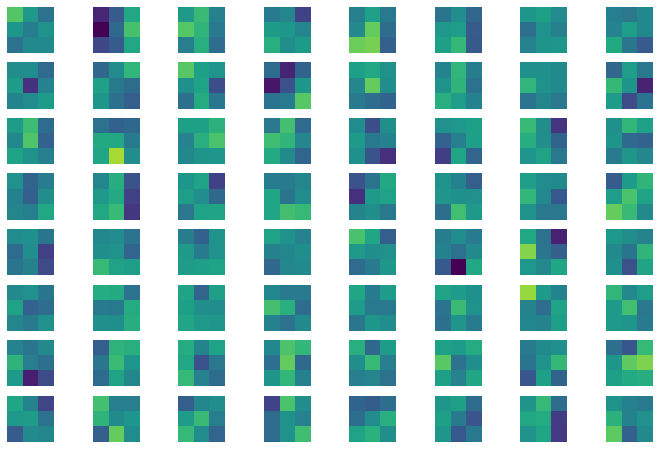

In [128]:
# 두 번째 합성곱 층의 필터(커널) 시각화
fig, axs = plt.subplots(8,8, figsize=(12,8))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(conv2_weights[:, :, 0, i*8+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

## 특성맵 시각화

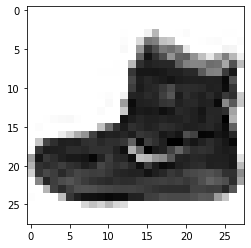

In [80]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

(1, 28, 28, 32)


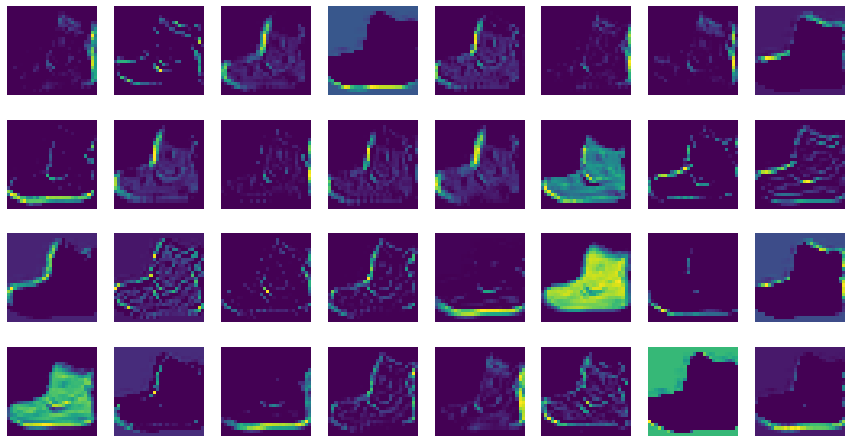

In [89]:
# 첫 번째 합성곱 층이 만든 특성맵 (이미지의 시각적인 정보를 감지함.)
conv1_acti = keras.Model(model.input, model.layers[0].output)
inputs = train_input[:1].reshape(-1, 28, 28, 1) / 255.0
feature1_maps = conv1_acti.predict(inputs) 
print(feature1_maps.shape)

fig, axs = plt.subplots(4,8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature1_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

(1, 14, 14, 64)


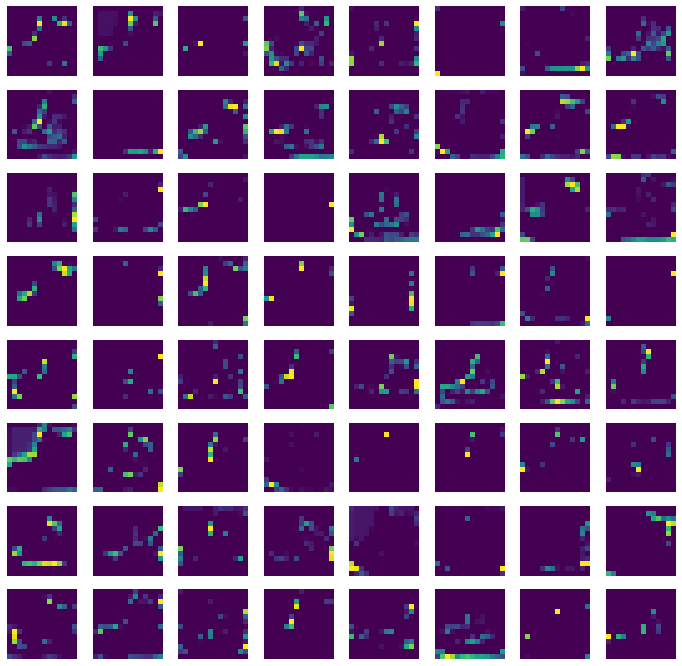

In [91]:
# 두 번째 합성곱 층이 만든 특성맵 (앞에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습함.)
conv2_acti = keras.Model(model.input, model.layers[2].output) 
inputs = train_input[:1].reshape(-1, 28, 28, 1) / 255.0
feature2_maps = conv2_acti.predict(inputs) 
print(feature2_maps.shape)

fig, axs = plt.subplots(8,8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()